Text(0, 0.5, 'Selling Price')

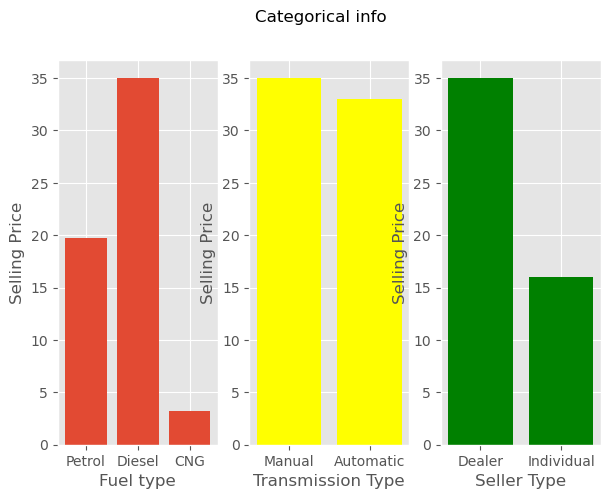

In [20]:
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt

car_info = pd.read_csv("car data.csv")
car_info = car_info.rename(columns=str.lower)

fuel_info = car_info["fuel_type"]
transmission_info = car_info["transmission"]
seller_info = car_info["seller_type"]
selling_price = car_info["selling_price"]
# car_info.head()

style.use("ggplot")
chart = plt.figure(figsize=(7,5))
chart.suptitle("Categorical info")

plt.subplot(1,3,1)
plt.bar(fuel_info, selling_price)
plt.xlabel("Fuel type")
plt.ylabel("Selling Price")

plt.subplot(1,3,2)
plt.bar(transmission_info, selling_price, color="Yellow")
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price")

plt.subplot(1,3,3)
plt.bar(seller_info, selling_price, color="Green")
plt.xlabel("Seller Type")
plt.ylabel("Selling Price")






In [6]:
# Above plot is created based on grouping the values and plot max values
petrol_data = car_info.groupby(["fuel_type"]).get_group("Petrol")
diesel_data = car_info.groupby(["fuel_type"]).get_group("Diesel")
cng_data = car_info.groupby(["fuel_type"]).get_group("CNG")
cng_data


,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0


In [7]:
print(car_info["fuel_type"].unique())
print(car_info["seller_type"].unique())
print(car_info["transmission"].unique())


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [21]:
# Make the values as integer so that it can be used for training
car_info.replace({"fuel_type": {"Petrol":1,"Diesel":2,"CNG":3},
                  "seller_type" : {"Dealer":0 , "Individual":1},
                 "transmission": {"Manual":0,"Automatic":1}},inplace=True)

In [10]:
print(car_info["fuel_type"].unique())
print(car_info["seller_type"].unique())
print(car_info["transmission"].unique())

[1 2 3]
[0 1]
[0 1]


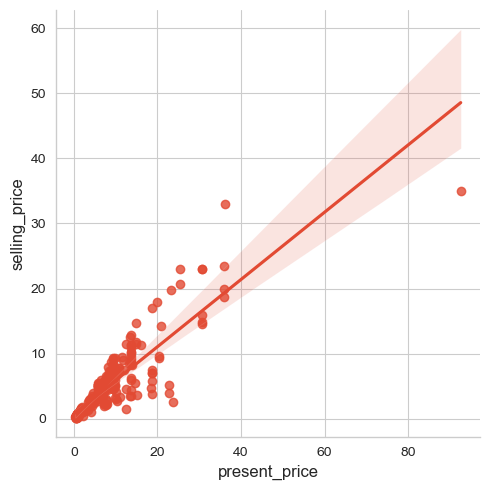

In [22]:
# To find linearity. If there is no linearity then linear reg model won't fit
import seaborn as sns 
  
# car_info
sns.set_style('whitegrid') 
sns.lmplot(x ='present_price', y ='selling_price', data = car_info) 

In [18]:
# Split input and output data
input_data = car_info.drop(columns=["selling_price","car_name"])
out_data = car_info["selling_price"]
input_data
out_data

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: selling_price, Length: 301, dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
b4_scaler = input_data.copy()
input_data = scaler.fit_transform(input_data)
print(b4_scaler)
print("After Scaler")
print(input_data)


[[ 0.128897   -0.23621461 -0.25622446 ... -0.73728539 -0.39148015
  -0.17450057]
 [-0.21751369  0.22150462  0.1559105  ... -0.73728539 -0.39148015
  -0.17450057]
 [ 1.16812909  0.25742689 -0.77396901 ... -0.73728539 -0.39148015
  -0.17450057]
 ...
 [-1.60315648  0.39068691  1.31334003 ... -0.73728539 -0.39148015
  -0.17450057]
 [ 1.16812909  0.56450434 -0.7198763  ... -0.73728539 -0.39148015
  -0.17450057]
 [ 0.8217184  -0.20029235 -0.81095812 ... -0.73728539 -0.39148015
  -0.17450057]]
After Scaler
[[ 0.128897   -0.23621461 -0.25622446 ... -0.73728539 -0.39148015
  -0.17450057]
 [-0.21751369  0.22150462  0.1559105  ... -0.73728539 -0.39148015
  -0.17450057]
 [ 1.16812909  0.25742689 -0.77396901 ... -0.73728539 -0.39148015
  -0.17450057]
 ...
 [-1.60315648  0.39068691  1.31334003 ... -0.73728539 -0.39148015
  -0.17450057]
 [ 1.16812909  0.56450434 -0.7198763  ... -0.73728539 -0.39148015
  -0.17450057]
 [ 0.8217184  -0.20029235 -0.81095812 ... -0.73728539 -0.39148015
  -0.17450057]]


In [24]:
from sklearn.model_selection import train_test_split

in_data_train,in_data_test,out_data_train,out_data_test = train_test_split(input_data,out_data,test_size=0.3)
print(in_data_train.shape)
print(out_data_train.shape)
print(in_data_test.shape)
print(out_data_test.shape)

(210, 7)
(210,)
(91, 7)
(91,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear = LinearRegression()
linear.fit(in_data_train,out_data_train)
predicted_lin_reg = linear.predict(in_data_test)
predicted_lin_reg


array([ 1.77020993e+00,  7.96711665e-01,  9.63125242e+00,  1.05600498e+01,
        1.77660130e+01,  8.83681575e+00, -3.44615993e+00,  2.16841347e+00,
        5.04073632e+01,  7.36643680e+00,  2.79659295e+00,  4.43803970e+00,
        3.68894414e+00,  1.13918964e+00,  8.41477128e+00,  6.23085433e+00,
        8.60450834e+00, -1.06340228e+00,  6.55936567e+00,  2.42053218e-01,
        9.34357777e+00,  1.50487102e+00, -2.10290696e-02,  4.67606784e+00,
        3.35143049e+00, -5.21743087e-01,  3.95684129e+00,  1.00713134e+00,
        4.76265156e+00,  9.48827570e-01,  1.61040997e+00,  3.63531462e+00,
        4.57109469e+00,  4.00357592e-01,  2.39717759e+00,  4.23592482e+00,
        1.60003466e+00,  7.95984805e+00,  3.21834442e+00,  5.48052060e+00,
        7.92912300e+00,  1.29041287e+01, -2.86695148e-02,  1.50442956e+01,
        1.08723577e+00,  2.68598254e-01,  2.13597656e+00,  4.90705279e+00,
       -5.24913570e-01,  4.06206818e+00,  4.69570097e-02,  3.93313773e+00,
        2.14718255e+00,  

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
# Lesser error the better
print(f"Mean absolute error: {mean_absolute_error(predicted_lin_reg,out_data_test)}")
print(f"Mean squared error: {mean_squared_error(predicted_lin_reg,out_data_test)}")
# high score is better. 0.88 means 88% accurate which is good
print(f"R2 Score: {r2_score(predicted_lin_reg,out_data_test)}")

Mean absolute error: 1.1988178633140776
Mean squared error: 4.627279243379184
R2 Score: 0.8810762946419278
